In [1]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100, noise=0.25,random_state=3)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=6,random_state=2,criterion='entropy')
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=2)

In [4]:
print("학습용:",forest.score(X_train, y_train)) 
print("검증용:",forest.score(X_test, y_test)) 

학습용: 0.96
검증용: 0.92


In [5]:
import numpy as np

idx=0
result=[]
for f in forest.estimators_:
    result.append(f.score(X_test,y_test))
    idx+=1

print(result)
print(max(result))
print(np.argmax(result))

[0.84, 0.88, 0.8, 0.92, 0.88, 0.8]
0.92
3


[Text(659.4545454545455, 747.4499999999999, 'X[1] <= 0.498\nentropy = 0.994\nsamples = 50\nvalue = [41, 34]'),
 Text(405.8181818181818, 611.55, 'X[1] <= 0.206\nentropy = 0.712\nsamples = 30\nvalue = [8, 33]'),
 Text(202.9090909090909, 475.65, 'X[0] <= -0.588\nentropy = 0.503\nsamples = 21\nvalue = [3, 24]'),
 Text(101.45454545454545, 339.74999999999994, 'entropy = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(304.3636363636364, 339.74999999999994, 'entropy = 0.0\nsamples = 20\nvalue = [0, 24]'),
 Text(608.7272727272727, 475.65, 'X[1] <= 0.468\nentropy = 0.94\nsamples = 9\nvalue = [5, 9]'),
 Text(507.27272727272725, 339.74999999999994, 'X[1] <= 0.348\nentropy = 0.991\nsamples = 7\nvalue = [5, 4]'),
 Text(405.8181818181818, 203.8499999999999, 'X[0] <= 1.199\nentropy = 0.985\nsamples = 5\nvalue = [3, 4]'),
 Text(304.3636363636364, 67.94999999999993, 'entropy = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(507.27272727272725, 67.94999999999993, 'entropy = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(

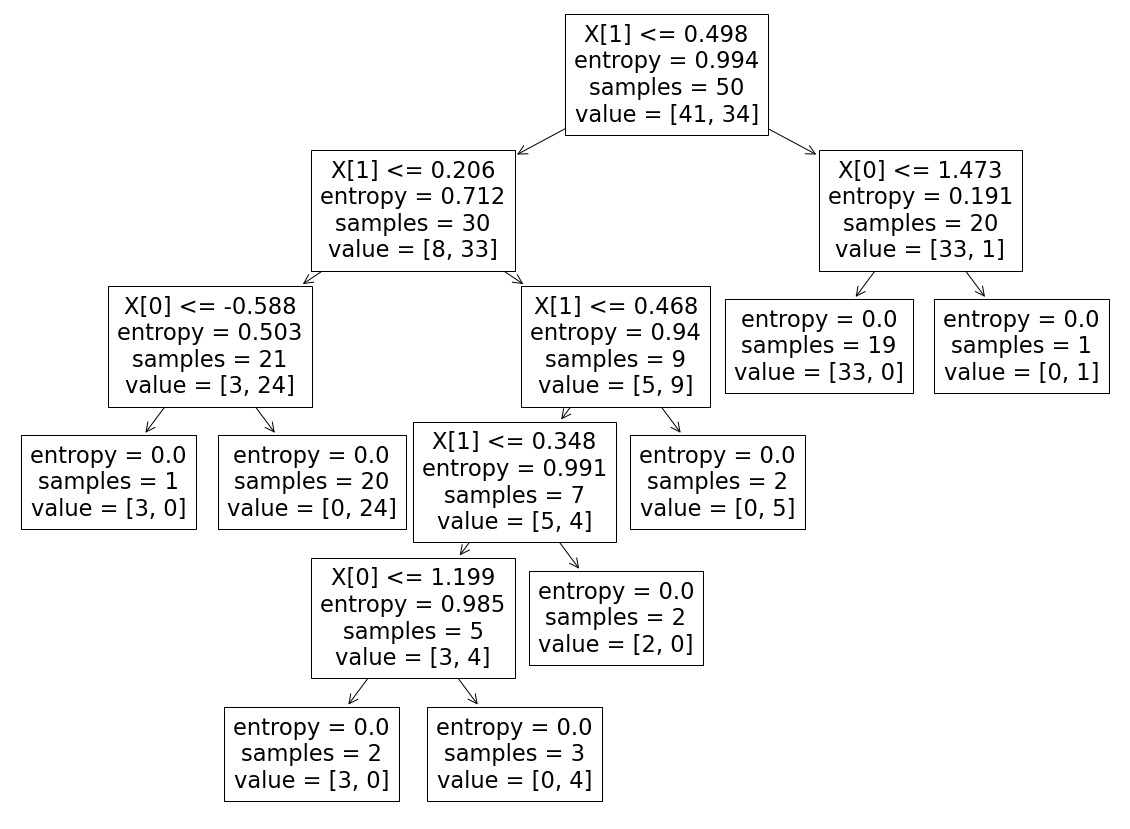

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(forest.estimators_[3])

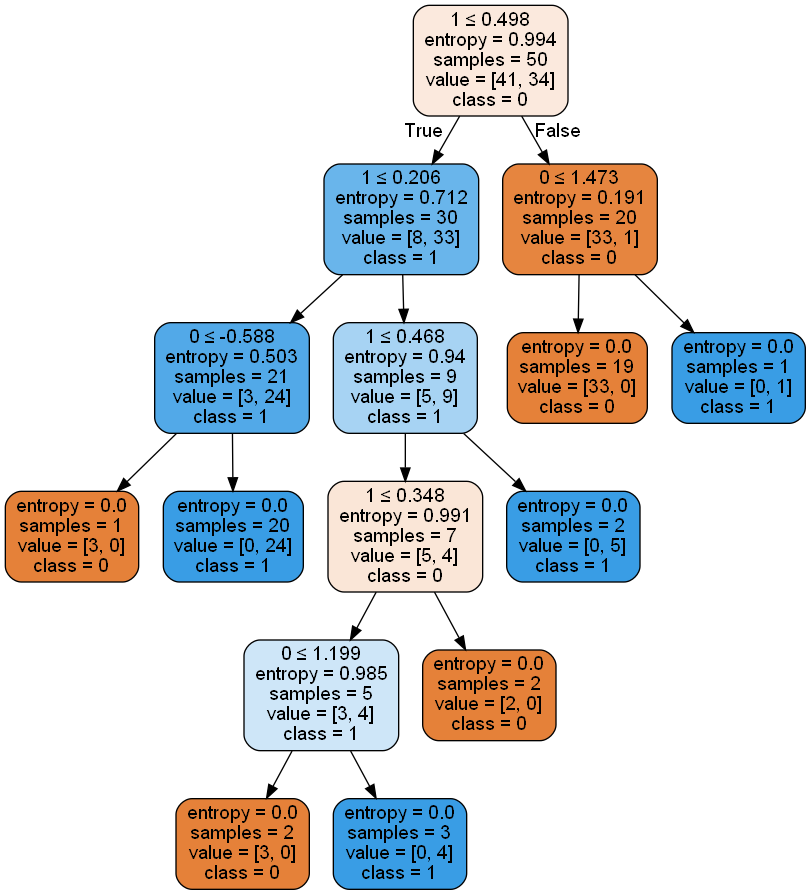

In [7]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data=export_graphviz(forest.estimators_[3], out_file=None,feature_names=[0,1],
class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
np.ravel(x)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

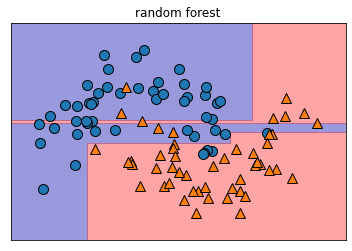

In [10]:
import mglearn
mglearn.plots.plot_2d_separator(forest.estimators_[3],X,fill=True,alpha=0.4)
plt.title("random forest")
mglearn.discrete_scatter(X[:,0],X[:,1],y)

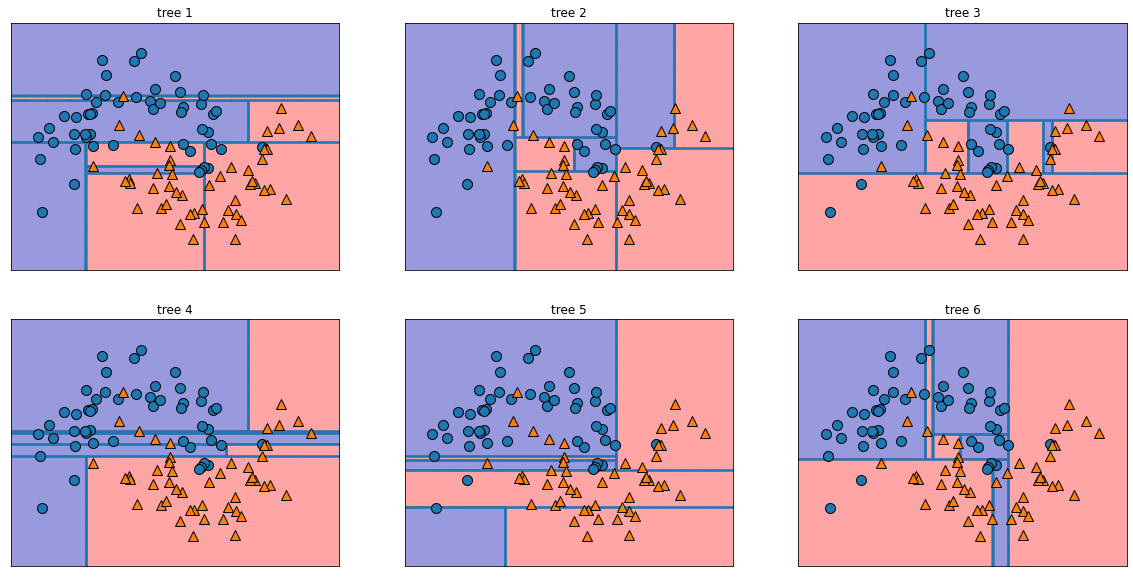

In [12]:
fig, axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title(f'tree {i+1}')
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)